In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Load the dataset
df = pd.read_csv("TASK-ML-INTERN.csv")

In [ ]:
# Identify the target column
target_col = 'DON_concentration'


In [ ]:
# Handling missing values
df.dropna(inplace=True)

In [ ]:
# Drop the ID column
X = df.drop(columns=["hsi_id", "vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_pca, y_train)
y_pred_xgb = xgb_model.predict(X_test_pca)

In [ ]:
# ANN Model
ann_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
ann_model.compile(optimizer='adam', loss='mse')
ann_model.fit(X_train_pca, y_train, epochs=100, batch_size=16, verbose=0)
y_pred_ann = ann_model.predict(X_test_pca).flatten()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_ann, "ANN")

XGBoost - MAE: 3216.84, RMSE: 12414.44, R2: 0.4487
ANN - MAE: 3312.09, RMSE: 9332.17, R2: 0.6884


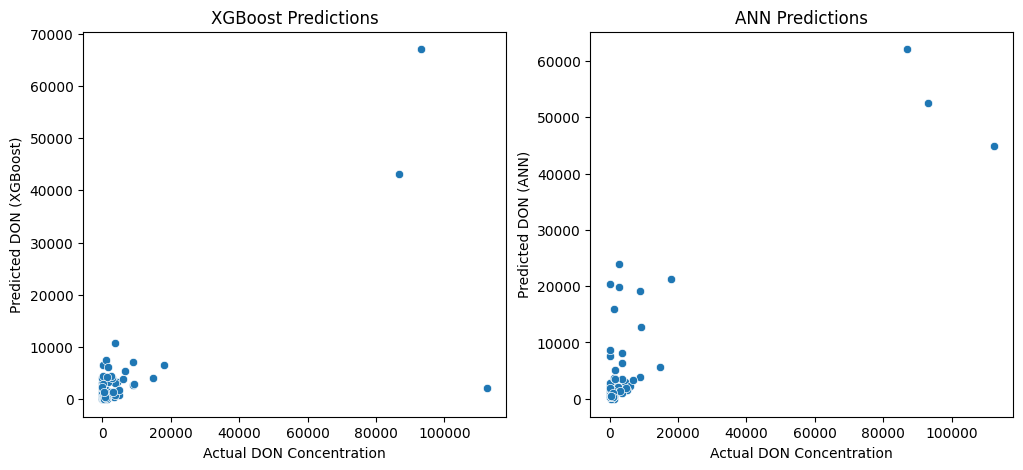

In [ ]:
# Scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON (XGBoost)")
plt.title("XGBoost Predictions")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_ann)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON (ANN)")
plt.title("ANN Predictions")
plt.show()